In [ ]:
D:\Programs\MongoDB\Server\3.6\bin>mongod.exe --dbpath D:\mongodb\data

In [1]:
library("Rfacebook")
library("mongolite")

Warning message:
"package 'Rfacebook' was built under R version 3.4.3"Loading required package: httr
Loading required package: rjson
Loading required package: httpuv
Warning message:
"package 'httpuv' was built under R version 3.4.3"
Attaching package: 'Rfacebook'

The following object is masked from 'package:methods':

    getGroup

Warning message:
"package 'mongolite' was built under R version 3.4.3"

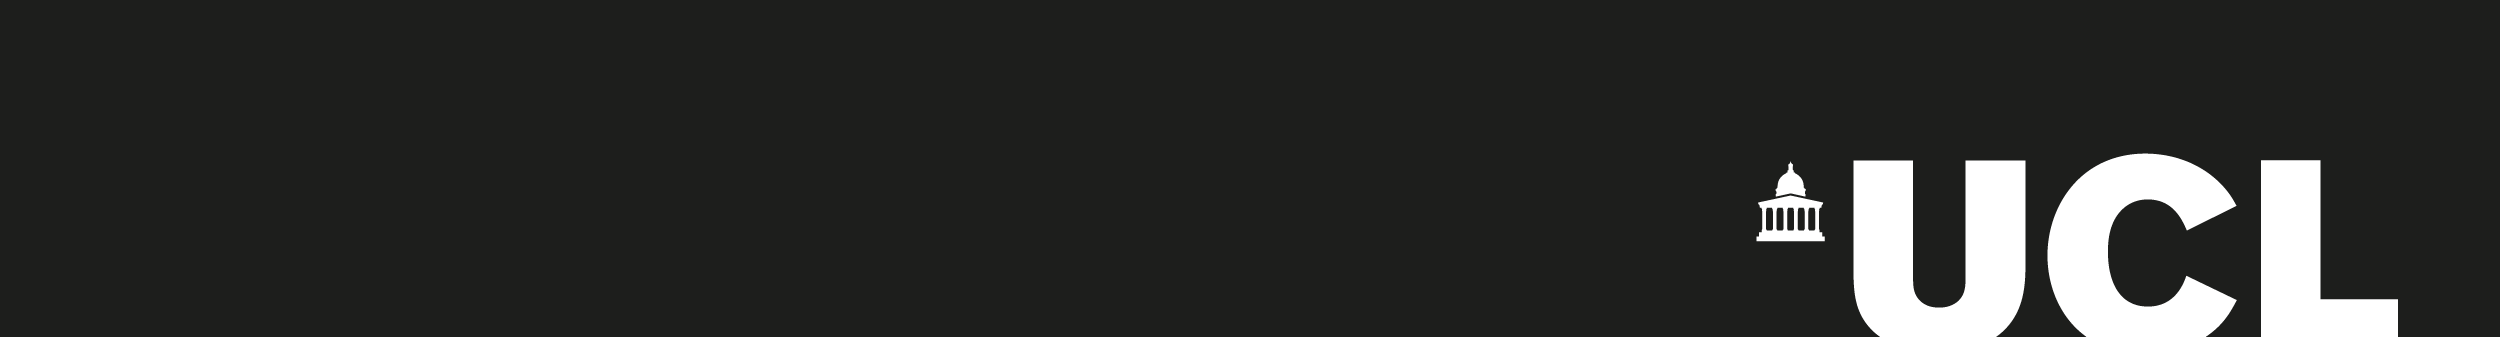
# STREAMLINING ‘BIG DATA’
#### Adapting workflows for the extraction and management of large volumes of social media data for digital heritage research.
<div class="parent" style="float: right; color:lightgrey">
<p> CAA 2018 Conference: <br>
Thursday, 22 March 2018, 2:05pm-2:25pm <br>
Neue Aula, Room 5 <br>
University of Tübingen </p>
</div>

Marta Krzyzanska <span style="color:blue">@MKrz17</span>  
Dr Chiara Bonacchi <span style="color:blue">@ChBonacchi</span>      
UCL Institute of Archaeology


<div class="parent" style="float: right;">
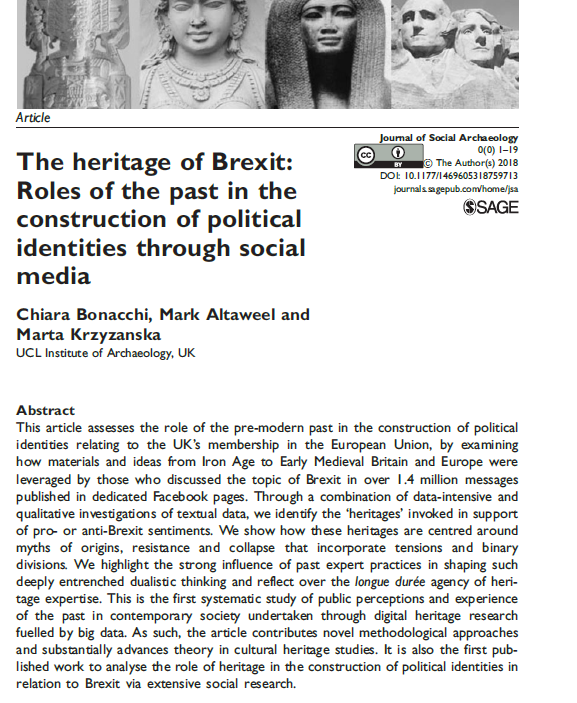
</div>

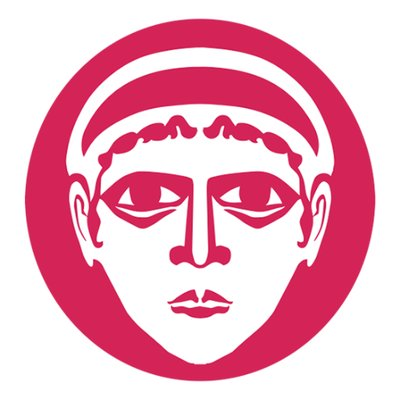 

   #  Ancient Identities Today 
##### ancientidentities.org 
<div class="parent" style="float: right;">
</div>
<br>
<p>- To explore the diversity of heritagescreated from IA, Roman & Early Medieval pasts by stakeholders across Britain. <p>   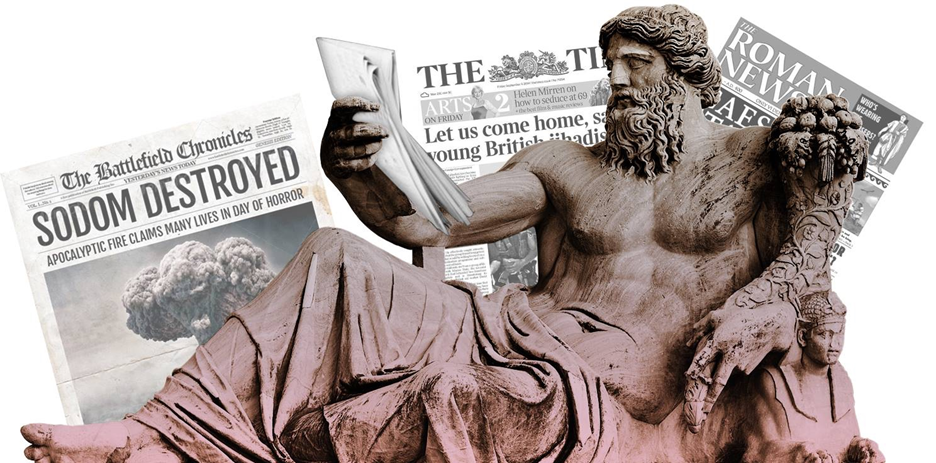                      <p>- To document the contrasting values inherent in these heritages. <p> 
<p> - ** Digital Heritage component: **     
 to explore large quantites of social media data <p>
</div>



# Big Data

#### Kitchin, R. (2014) *Big Data, new epistemologies and paradigm shifts.*


- **huge in volume**: consisting of terabytes or petabytesof data 
- **high in velocity**:  being created in or near real-time 
- **diverse in variety** (structured and unstructured) 
- **exhaustive in scope**, striving to capture entire populations or systems 
- **relational in nature**, containing common fields that enable the conjoining of different data sets 
- **flexible**, holding the traits of *extensionality* (can add new fields easily) and *scaleability* (can expand in size rapidly) 

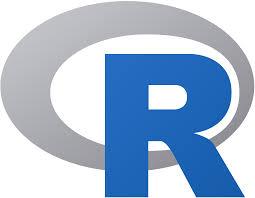
## Package ‘Rfacebook’ 

```
searchPages(string, token, n = 200)
```
Arguments


***```string```*** string or string vector containing keywords to search. When searching using multiple keywords, the returned results will be pages whose name contains all
             the keywords.

***``` token```***  Either a temporary access token created at https://developers.facebook.
com/tools/exploreror the OAuth token created withfbOAuth.

***``` n```***  Maximum number of pages to return.


In [2]:
### Set working directory:
setwd("D:\\CAA2018")

In [3]:
### Load the Rfacebook library
library("Rfacebook")

In [4]:
### Get the token
load("fb_oauth.R") 
token <- fb_oauth

In [5]:
### Define n
n <- 400

In [6]:
###Define keyword:
keyword <- "Roman Empire"

In [7]:
#Get the dataframe of pages:
x <- searchPages(keyword,token,n)

200 pages 

Warning message in vect[notnulls] <- unlist(lapply(lst, function(x) x[[field]])):
"number of items to replace is not a multiple of replacement length"

400  

Warning message in vect[notnulls] <- unlist(lapply(lst, function(x) x[[field]])):
"number of items to replace is not a multiple of replacement length"

In [8]:
tail(x)

,id,about,category,description,general_info,likes,link,city,state,country,latitude,longitude,name,talking_about_count,username,website
395,712974162210748,NA,Sports,NA,NA,NA,https://www.facebook.com/Roman-Reigns-Empire-712974162210748/,Quetta Cantonment,NA,Pakistan,30.21470,67.03030,Roman Reigns Empire,28,NA,NA
396,711700458880899,NA,Home,NA,NA,NA,https://www.facebook.com/pages/Roman-Empire/711700458880899,Memphis,TN,United States,35.17557,-89.86221,Roman Empire,0,NA,NA
397,706740652751620,NA,College & University,NA,NA,NA,https://www.facebook.com/pages/History-of-the-Roman-Empire/706740652751620,Baton Rouge,LA,United States,30.44899,-91.13762,History of the Roman Empire,0,NA,NA
398,1423687054626879,NA,Automotive Repair Shop,NA,NA,NA,https://www.facebook.com/pages/Roman-Empire/1423687054626879,Cleveland,OH,United States,41.47643,-81.73111,Roman Empire,0,NA,NA
399,1375254626057881,NA,Home,NA,NA,NA,https://www.facebook.com/pages/The-Roman-Empire/1375254626057881,Great Falls,VA,United States,39.03530,-77.34924,The Roman Empire,0,NA,NA
400,1295422833830869,NA,Residence,NA,NA,NA,https://www.facebook.com/pages/Aksaz-Tatil-Sitesi-Tekeli-Nagidos-Hadrianopolis-Roman-Empire/1295422833830869,Bozyazi,NA,Turkey,36.12747,33.11914,"Aksaz Tatil Sitesi, Tekeli Nagidos Hadrianopolis, Roman Empire",0,NA,NA


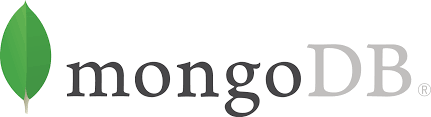
                      
{                                                                                                                                                
        "category" : "Residence",                                             
        "city" : "Las Piñas",                                                  
        "country" : "Philippines",                                                                                     
        "latitude" : 14.427075212,                                              
        "link" : "https://www.facebook.com/pages/Roman-Empire/293220100810923", 
        "longitude" : 121.015245647,                                            
        "name" : "Roman Empire",                                                
        "talking_about_count" : 0                                                    
}




In [9]:
### Load the Mongolite library
library("mongolite")

In [10]:
### Define the connection to the database:    
col <- mongo(collection = "pages", db = "CAA2018")

In [11]:
names(x)[names(x) == "id"]<-"_id"

In [12]:
col$insert(x)

ERROR: Error: invalid bytes in UTF8 string


In [13]:
x <- as.data.frame(apply(x,2, function(x) unlist(lapply(x,function(y) iconv(y,"UTF-8", "UTF-8",sub='')))))

In [14]:
col$insert(x)

List of 5
 $ nInserted  : num 400
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: list()

In [15]:
facebookPagesToMongo <-function(keyword, collection, database,token, n){
    
    #Get the dataframe of pages:
    x <- searchPages(keyword,token,n)
    
    #Define the connection to the database:    
    col <- mongo(collection = collection, db = database)
    
    #Get the list of page ids that are already in the collection to which we will be inserting our data
    
    ids <- col$find('{}','{"_id":1}')
    
    
    #Check if there were any entires of the Facebook Pages in the collection:
    
    if(length(ids)>0){
        
        #If there were, remove the pages with the ids that are already in the collection from the dataframe:        
        x <- subset(x, !(x$id %in% ids[,1]))    
        
     }
    
    #Rename the id field into _id field so it can become a unique identifier in the MongoDB
  
    names(x)[names(x) == "id"]<-"_id"
    
    #Insert data into MongoDB:
    
    #Use tryCatch to try to insert the dataframe into the collection
    
    tryCatch(col$insert(x), #try inserting data
             
            error=function(error_message){
                message(error_message)
                utf_error <- "invalid bytes in UTF8 string"
                print(error_message$message)
                
                #If there are invalid bytes in UTF8 string, its likely because of emoticones. Get rid of them and retry inserting
                if(error_message$message==utf_error){
                    x <- as.data.frame(apply(x,2, function(x) unlist(lapply(x,function(y) iconv(y,"UTF-8", "UTF-8",sub='')))))
                    col$insert(x)}else{col$insert(x)}
            })
}
    


In [16]:
### Get list of keywords:
keywords <- c("Roman Empire", "Iron Age", "Middle Ages")

In [17]:
lapply(keywords, facebookPagesToMongo, collection="pages",database="CAA2018", token=fb_oauth, n=10)

10 pages 

Warning message in vect[notnulls] <- unlist(lapply(lst, function(x) x[[field]])):
"number of items to replace is not a multiple of replacement length"

10 pages 

Warning message in vect[notnulls] <- unlist(lapply(lst, function(x) x[[field]])):
"number of items to replace is not a multiple of replacement length"

10 pages 

Warning message in vect[notnulls] <- unlist(lapply(lst, function(x) x[[field]])):
"number of items to replace is not a multiple of replacement length"

[[1]]
List of 5
 $ nInserted  : num 0
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: NULL

[[2]]
List of 5
 $ nInserted  : num 10
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: list()

[[3]]
List of 5
 $ nInserted  : num 10
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: list()


```
getPage(page, token, n = 25, since = NULL, until = NULL, feed = FALSE,
reactions = FALSE, verbose = TRUE, api = NULL)

```

In [18]:
# Get the list of page ids from the database

page_ids<-col$find('{}','{"_id":1}')
head(page_ids)

_id
1580243982284158
1712216448849183
1563625070629728
128530647818442
120478768682716
1859217847723908


In [19]:
# Get the first id

id <- page_ids[1,]
id

[1] "1580243982284158"

In [20]:
x <- getPage(id, fb_oauth, n=10)

10 posts 

In [21]:
x

from_id,from_name,message,created_time,type,link,id,story,likes_count,comments_count,shares_count
1580243982284158,Roman EmPire,Rumour of the Day With #Hindi Subtitles,2018-03-19T09:00:12+0000,video,https://www.facebook.com/RomanEmPire0314/videos/1786227621685792/,1580243982284158_1786227621685792,NA,9,0,9
1580243982284158,Roman EmPire,NA,2018-03-19T06:58:36+0000,video,https://www.youtube.com/attribution_link?a=3x2brNr-RaY&u=%2Fwatch%3Fv%3DJRPkBWdCB_I%26feature%3Dplayer_embedded,1580243982284158_1786176598357561,Roman EmPire shared a link.,1,0,0
1580243982284158,Roman EmPire,NA,2018-03-19T06:57:58+0000,video,https://www.youtube.com/attribution_link?a=rQjlnpQjRoc&u=%2Fwatch%3Fv%3Do_pKmVHZEJQ%26feature%3Dplayer_embedded,1580243982284158_1786176468357574,Roman EmPire shared a link.,0,0,0
1580243982284158,Roman EmPire,NA,2018-03-19T06:57:40+0000,video,https://www.youtube.com/attribution_link?a=f2v9WKGm1Y8&u=%2Fwatch%3Fv%3DLJhm319t4ZY%26feature%3Dplayer_embedded,1580243982284158_1786176301690924,Roman EmPire shared a link.,0,0,0
1580243982284158,Roman EmPire,NA,2018-03-19T06:34:38+0000,video,https://www.youtube.com/attribution_link?a=1luYAYeyXpE&u=%2Fwatch%3Fv%3DGZFtRXEGsBo%26feature%3Dshare,1580243982284158_1786171095024778,Roman EmPire shared a link.,0,0,0
1580243982284158,Roman EmPire,"<iframe width=""640"" height=""360"" src=""https://www.youtube.com/embed/d96ULpt1A00"" frameborder=""0"" allow=""autoplay; encrypted-media"" allowfullscreen></iframe> You Can Watch This Right Here After Clicking This Thank You",2018-03-17T05:46:36+0000,video,https://www.youtube.com/embed/d96ULpt1A00,1580243982284158_1785443471764207,NA,4,0,0
1580243982284158,Roman EmPire,NA,2018-03-17T05:26:06+0000,video,https://www.youtube.com/attribution_link?a=SM8-NLRx36g&u=%2Fwatch%3Fv%3Dd96ULpt1A00%26feature%3Dshare,1580243982284158_1785438538431367,Roman EmPire shared a link.,1,0,0
1580243982284158,Roman EmPire,#TheBigDog,2018-03-16T05:50:23+0000,photo,https://www.facebook.com/RomanEmPire0314/photos/a.1580245572283999.1073741826.1580243982284158/1785072555134632/?type=3,1580243982284158_1785072885134599,Roman EmPire added 10 new photos.,54,0,15
1580243982284158,Roman EmPire,<ed><U+00A0><U+00BD><ed><U+00B8><U+00AE><ed><U+00A0><U+00BD><ed><U+00B8><U+00AE><ed><U+00A0><U+00BD><ed><U+00B8><U+00AE>,2018-03-16T05:49:16+0000,photo,https://www.facebook.com/RomanEmPire0314/photos/a.1580245572283999.1073741826.1580243982284158/1785071128468108/?type=3,1580243982284158_1785072355134652,Roman EmPire added 24 new photos — feeling heartbroken.,26,0,6
1580243982284158,Roman EmPire,NA,2018-03-16T05:33:38+0000,video,https://www.youtube.com/attribution_link?a=M2AE46jUXYQ&u=%2Fwatch%3Fv%3D_i_4qd1sIB0%26feature%3Dplayer_embedded,1580243982284158_1785067208468500,Roman EmPire shared a link.,2,0,0


# BIG DATA PROBLEMS

- limit Error ***"(#17) User request limit reached"***

- unexpected Error *** "An unexpected error has occurred. Please retry your request later."***

- ***"Unsupported get request. Object with ID '1010409752356867_1179270792137428' does not exist, cannot be loaded due to missing permissions, or does not support this operation. Please read the Graph API documentation at https://developers.facebook.com/docs/graph-api"*** 

In [22]:
handleAPIErrors <- function(id,token,n){
    
    # define errors
   
    limitError <-"(#17) User request limit reached"
    unexpectedError<-"An unexpected error has occurred. Please retry your request later."
    
    # start loop to infinitely try to get the data, until specific condition is reached
    z=1
    y=2
    while(z<y){
        z=z+1
        
        #Define the error handling mechnism
        content<-tryCatch(
        
            getPage(page=id, token=token, n=n),
                error=function(error_message){
                message(error_message)
                error_message<-append(error_message, id)
                    
            if(error_message$message==limitError){
                        Sys.sleep(900)
                return (1)
            }else if(error_message$message==unexpectedError){
            return (1)}else{
            return(error_message)
            z=y}
        }
        )
                     
        if(class(content)=="numeric"){
        z=1}
    }
    return (content)
}

In [23]:
x <- handleAPIErrors(id,token=fb_oauth,n=10)

10 posts 

In [24]:
x

from_id,from_name,message,created_time,type,link,id,story,likes_count,comments_count,shares_count
1580243982284158,Roman EmPire,Rumour of the Day With #Hindi Subtitles,2018-03-19T09:00:12+0000,video,https://www.facebook.com/RomanEmPire0314/videos/1786227621685792/,1580243982284158_1786227621685792,NA,9,0,9
1580243982284158,Roman EmPire,NA,2018-03-19T06:58:36+0000,video,https://www.youtube.com/attribution_link?a=3x2brNr-RaY&u=%2Fwatch%3Fv%3DJRPkBWdCB_I%26feature%3Dplayer_embedded,1580243982284158_1786176598357561,Roman EmPire shared a link.,1,0,0
1580243982284158,Roman EmPire,NA,2018-03-19T06:57:58+0000,video,https://www.youtube.com/attribution_link?a=rQjlnpQjRoc&u=%2Fwatch%3Fv%3Do_pKmVHZEJQ%26feature%3Dplayer_embedded,1580243982284158_1786176468357574,Roman EmPire shared a link.,0,0,0
1580243982284158,Roman EmPire,NA,2018-03-19T06:57:40+0000,video,https://www.youtube.com/attribution_link?a=f2v9WKGm1Y8&u=%2Fwatch%3Fv%3DLJhm319t4ZY%26feature%3Dplayer_embedded,1580243982284158_1786176301690924,Roman EmPire shared a link.,0,0,0
1580243982284158,Roman EmPire,NA,2018-03-19T06:34:38+0000,video,https://www.youtube.com/attribution_link?a=1luYAYeyXpE&u=%2Fwatch%3Fv%3DGZFtRXEGsBo%26feature%3Dshare,1580243982284158_1786171095024778,Roman EmPire shared a link.,0,0,0
1580243982284158,Roman EmPire,"<iframe width=""640"" height=""360"" src=""https://www.youtube.com/embed/d96ULpt1A00"" frameborder=""0"" allow=""autoplay; encrypted-media"" allowfullscreen></iframe> You Can Watch This Right Here After Clicking This Thank You",2018-03-17T05:46:36+0000,video,https://www.youtube.com/embed/d96ULpt1A00,1580243982284158_1785443471764207,NA,4,0,0
1580243982284158,Roman EmPire,NA,2018-03-17T05:26:06+0000,video,https://www.youtube.com/attribution_link?a=SM8-NLRx36g&u=%2Fwatch%3Fv%3Dd96ULpt1A00%26feature%3Dshare,1580243982284158_1785438538431367,Roman EmPire shared a link.,1,0,0
1580243982284158,Roman EmPire,#TheBigDog,2018-03-16T05:50:23+0000,photo,https://www.facebook.com/RomanEmPire0314/photos/a.1580245572283999.1073741826.1580243982284158/1785072555134632/?type=3,1580243982284158_1785072885134599,Roman EmPire added 10 new photos.,54,0,15
1580243982284158,Roman EmPire,<ed><U+00A0><U+00BD><ed><U+00B8><U+00AE><ed><U+00A0><U+00BD><ed><U+00B8><U+00AE><ed><U+00A0><U+00BD><ed><U+00B8><U+00AE>,2018-03-16T05:49:16+0000,photo,https://www.facebook.com/RomanEmPire0314/photos/a.1580245572283999.1073741826.1580243982284158/1785071128468108/?type=3,1580243982284158_1785072355134652,Roman EmPire added 24 new photos — feeling heartbroken.,26,0,6
1580243982284158,Roman EmPire,NA,2018-03-16T05:33:38+0000,video,https://www.youtube.com/attribution_link?a=M2AE46jUXYQ&u=%2Fwatch%3Fv%3D_i_4qd1sIB0%26feature%3Dplayer_embedded,1580243982284158_1785067208468500,Roman EmPire shared a link.,2,0,0


In [25]:
# Rename the id field into _id field so it can become a unique identifier in the MongoDB
    
names(x)[names(x) == "id"]<-"_id"

# Get rid of invalid bytes in UTF8 string

x <- as.data.frame(apply(x,2, function(x) unlist(lapply(x,function(y) iconv(y,"UTF-8", "UTF-8",sub='')))))

# Define the connection to the database: 
    
col <- mongo(collection = "posts", db = "CAA2018")
    
#Insert the data into the database
    
col$insert(x)

List of 5
 $ nInserted  : num 10
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: list()

<div class="parent" style="float: right;">
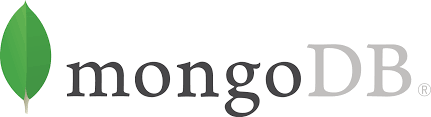


</div>



# MODELLING ONE-TO-MANY RELATIONSHIPS

1. **Embeded documents** - limit **16 megabytes**

2. **Normalized Data Models** - no limit but 

 requires **references** between collections


In [26]:
# Put the original page id as a reference id
referenceId <- id
referenceId

[1] "1580243982284158"

In [27]:
# Get the list of post ids for this Facebook page
ids<-x$"_id"
# Get the firt id
id <-ids[1]
id

[1] 1580243982284158_1786227621685792
10 Levels: 1580243982284158_1785067208468500 ...

In [28]:
# Define reference collection and field to be added to the document with the post where the reference will be stored
referenceCollection = "pages"
referenceDatabase = "CAA2018"
field = "page"
#Define connection to posts database
connection <- mongo(col="posts", db="CAA2018")

# Define reference database
s1 <- paste('{"_id": "', id,'"}', sep="")
s2 <- paste('{"$set":{"',field,'":{"$ref":"',referenceCollection,'","$id" :"', referenceId,'","$db" : "',referenceDatabase,'"}}}', sep="")

connection$update(s1,s2)

List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

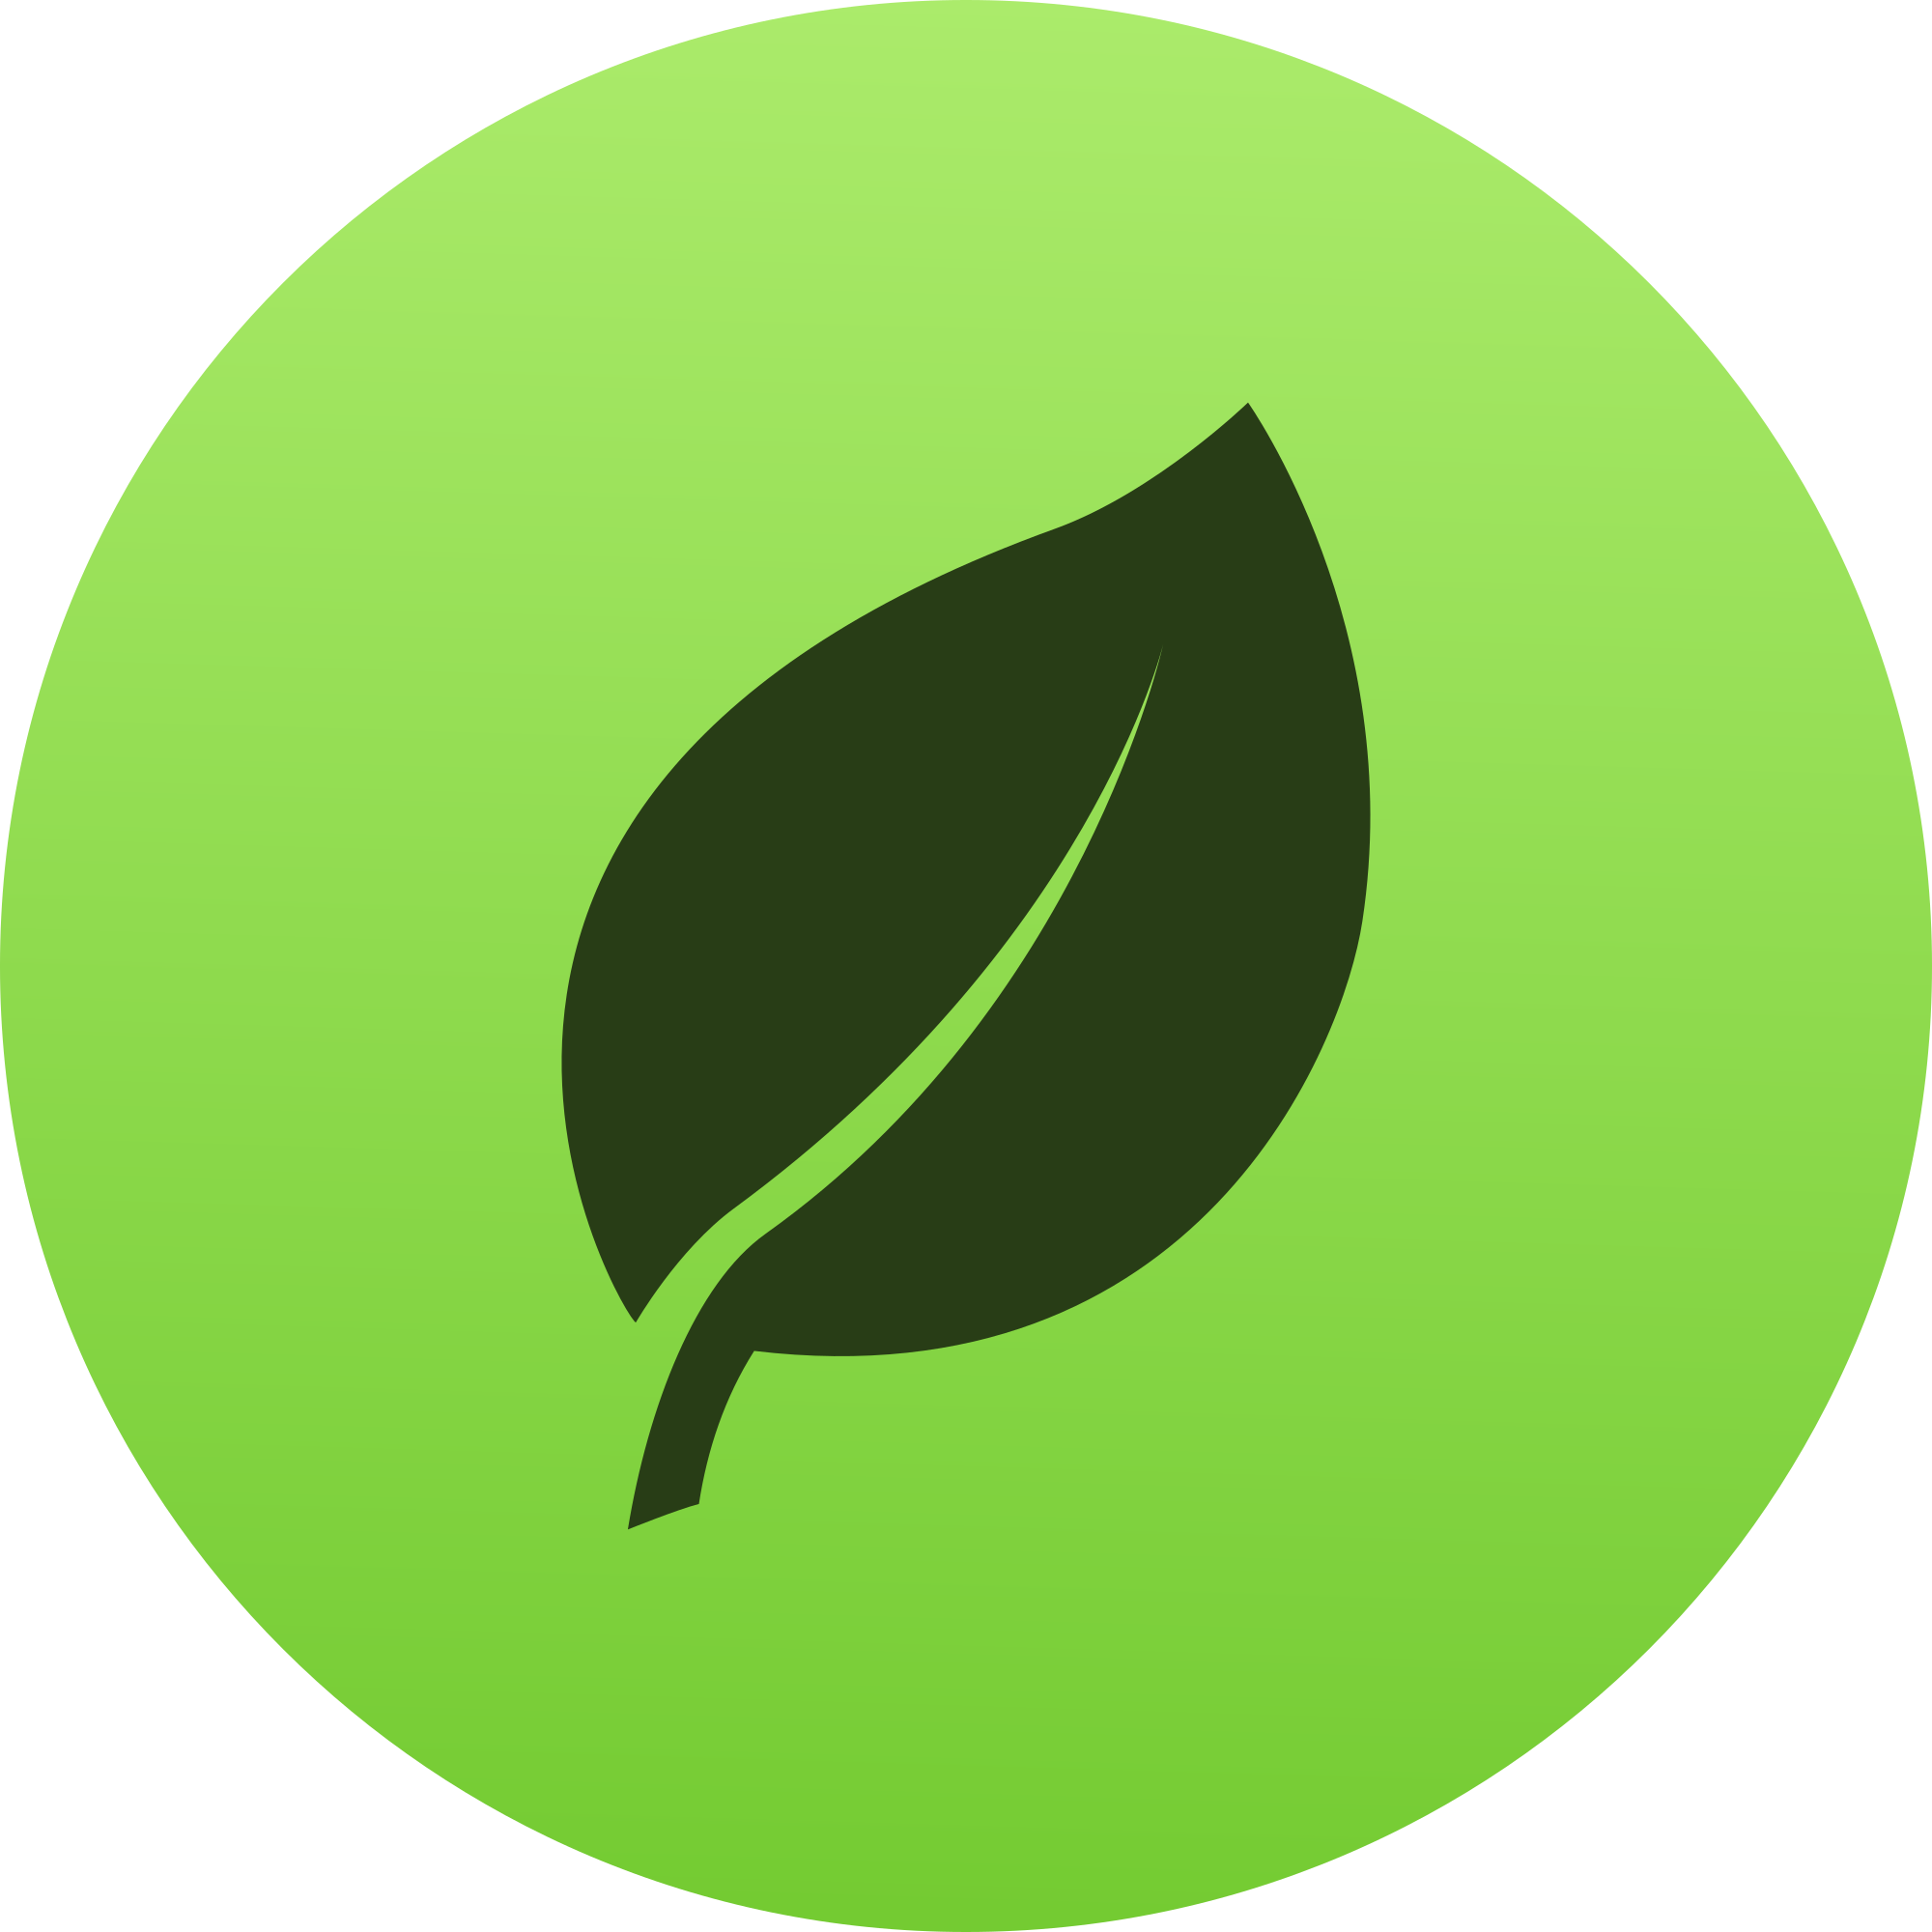
                      
{
        "_id" : "1563625070629728_1981036965555201",   
        "from_id" : "1563625070629728",    
        "from_name" : "Roman Empire √",  
        "message" : "how many likes ?",  
        "created_time" : "2018-01-19T04:02:50+0000",  
        "type" : "photo",  
        ...,  
        "likes_count" : 117,  
        "comments_count" : 2,  
        "shares_count" : 3,  
        <span style="color:red">"page" : DBRef("pages", "1563625070629728", "CAA2018")  </span>
}

In [29]:
# Define addReference function

addReference <- function(connection,id, referenceCollection, referenceId, referenceDatabase, field){
    s1 <- paste('{"_id": "', id,'"}', sep="")
    s2 <- paste('{"$set":{"',field,'":{"$ref":"',referenceCollection,'","$id" :"', referenceId,'","$db" : "',referenceDatabase,'"}}}', sep="")
    connection$update(s1,s2)}

# Define facebookPostsToMongo function

facebookPostsToMongo<-function(id, collection, database, token, n, pagesCollection, pagesDatabase){
    
        # Get the dataframe of posts:
    
       x <- handleAPIErrors(id,token,n)
    
       # Check whether the function returned the datadframe with the posts
        if(!is.null(x$id)){
            
            # Get the list of post ids that will be used to make references to pages collection
    
            ids <- x$id
    
            # Rename the id field into _id field so it can become a unique identifier in the MongoDB
    
            names(x)[names(x) == "id"]<-"_id"
    
            # Define the connection to the database:    
            col <- mongo(collection = collection, db = database)
            x <- as.data.frame(apply(x,2, function(x) unlist(lapply(x,function(y) iconv(y,"UTF-8", "UTF-8",sub='')))))
    
            col$insert(x)   
      
            
            #If pages collection and pages database are specified add reference to them in the posts collection
                                                                     
            if(!is.null(pagesCollection) && !is.null(pagesDatabase)){
                lapply(ids, addReference, connection=col, referenceCollection=pagesCollection, referenceId=id, referenceDatabase=pagesDatabase, field="page")
           }
        }
        
        # Define what to do when search for posts returns error:
                                                                     
        else if(class(x)=="list"){        
            error_message <- x$message
        
            #If there is an error message with uexpected character - omit the character so that it can be entered into the db.
            
            if(grepl("unexpected character",error_message)==TRUE){
                error_message <- "unexpected character"
                }
            
            #Check if information about the pages collection and pages database are defined.
            #If so, enter the information about the error to pages collection.
            
            if(!is.null(pagesCollection) && !is.null(pagesDatabase)){    
                s1=paste('{"_id":"',id,'"}', sep="")
                s2=paste('{"$set":{"error_message": "', error_message, '"}}',sep="")
                col <- mongo(collection = pagesCollection, db = pagesDatabase)
                col$update(s1,s2)
            }
                        
            #Otherwise enter the information about the error as a document in the posts collection
            else{
                a<-as.data.frame(cbind(id,error_message))
                 # Rename the id field into _id field so it can become a unique identifier in the MongoDB
                names(a)[names(a) == "id"]<-"_id"  
                col <- mongo(collection = collection, db = database)
                col$insert(a)                
            }
       
        }
    }

In [30]:
keywords <- c("roman empire", "iron age")

#Enter pages into the database
lapply(keywords, facebookPagesToMongo, collection="pages", database="CAA2018",token=fb_oauth, n=10)

# Get page ids

# Make sure you are connected to post collection
my_col <- mongo(collection = "pages", db = "CAA2018")
pages_ids<-my_col$find('{}','{"_id":1}')[,1]
# Get posts and enter them into the databse
lapply(pages_ids[1], facebookPostsToMongo, collection="posts2", database="CAA2018",token=fb_oauth, n=10, pagesCollection="pages", pagesDatabase="CAA2018")



10 pages 

Warning message in vect[notnulls] <- unlist(lapply(lst, function(x) x[[field]])):
"number of items to replace is not a multiple of replacement length"

10 pages 

Warning message in vect[notnulls] <- unlist(lapply(lst, function(x) x[[field]])):
"number of items to replace is not a multiple of replacement length"

[[1]]
List of 5
 $ nInserted  : num 0
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: NULL

[[2]]
List of 5
 $ nInserted  : num 0
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: NULL


10 posts 

[[1]]
[[1]][[1]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[2]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[3]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[4]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[5]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[6]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[7]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[8]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[9]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1

[[1]][[10]]
List of 2
 $ modifiedCount: int 1
 $ matchedCount : int 1




# Thank you for listening!   
<div class="parent" style="float: right; color:grey">
<p> We are thankful to… <br>
** The Ancient Identities Today team: ** <br>
Prof. Richard Hingley   
Dr Kate Sharpe, <br>
Dr Tom Yarrow <br>
Dr Mark Altaweel <br>



</p>

</div>

## Questions?

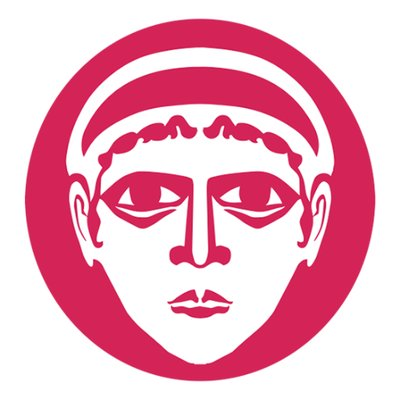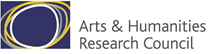
Marta Krzyzanska 
Dr Chiara Bonacchi    
UCL Institute of Archaeology 
